In [1]:
'''http://video.ittensive.com/python-advanced/data-44-structure-4.csv.gz данные по обьектам,
http://video.ittensive.com/python-advanced/russia.json карта России
Изучите набор данных по объектам культурного наследия России (в виде gz-архива):
и постройте фоновую картограмму по количеству объектов в каждом регионе России, используя гео-данные
Выведите для каждого региона количество объектов в нем.
Посчитайте число объектов культурного наследия в Татарстане.
Чему равно число объектов культурного наследия в Алтайском крае?'''
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
import pandas as pd





In [35]:
# данные с координатами
data_geo = gpd.read_file("http://video.ittensive.com/python-advanced/russia.json")
data_geo = data_geo.to_crs({'init' : 'epsg:3857'})
print(data_geo.head())

C:\Users\famely\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


   ID_0  ISO  NAME_0  ID_1             NAME_1  \
0   186  RUS  Russia    28  Karachay-Cherkess   
1   186  RUS  Russia    29            Karelia   
2   186  RUS  Russia    30           Kemerovo   
3   186  RUS  Russia    31         Khabarovsk   
4   186  RUS  Russia    32            Khakass   

                         NL_NAME_1  \
0  КАРАЧАЕВО-ЧЕРКЕССКАЯ РЕСПУБЛИКА   
1               РЕСПУБЛИКА КАРЕЛИЯ   
2              КЕМЕРОВСКАЯ ОБЛАСТЬ   
3                 ХАБАРОВСКИЙ КРАЙ   
4               РЕСПУБЛИКА ХАКАСИЯ   

                                           VARNAME_1      TYPE_1  ENGTYPE_1  \
0  Karaçay-Çerkes|Karachay-Cherkessiya|Karachayev...  Respublika   Republic   
1  Karelian A.S.S.R.|Karelo-Finnish A.S.S.R.|Kare...  Respublika   Republic   
2                                Kemerovskaya Oblast      Oblast     Region   
3                                  Khabarovskiy Kray        Kray  Territory   
4  Khakassiya|Republic of Khakasia|Khakasskaya A....  Respublika   Republic   

 

In [32]:
#данные по обьектам
data_cult = pd.read_csv("http://video.ittensive.com/python-advanced/data-44-structure-4.csv.gz", compression='gzip', usecols=["Объект","Регион"])


In [33]:
#print(data_cult.columns.tolist())

data_cult["Регион"] = data_cult["Регион"].str.upper()# приводим к верхнему регистру
data_cult = data_cult.groupby("Регион").count()#группировали посчитали колво обьектов

print (data_cult.index.values)

['АЛТАЙСКИЙ КРАЙ' 'АМУРСКАЯ ОБЛАСТЬ' 'АРХАНГЕЛЬСКАЯ ОБЛАСТЬ'
 'АСТРАХАНСКАЯ ОБЛАСТЬ' 'БЕЛГОРОДСКАЯ ОБЛАСТЬ' 'БРЯНСКАЯ ОБЛАСТЬ'
 'ВЛАДИМИРСКАЯ ОБЛАСТЬ' 'ВОЛГОГРАДСКАЯ ОБЛАСТЬ' 'ВОЛОГОДСКАЯ ОБЛАСТЬ'
 'ВОРОНЕЖСКАЯ ОБЛАСТЬ' 'Г. МОСКВА' 'Г. САНКТ-ПЕТЕРБУРГ' 'Г. СЕВАСТОПОЛЬ'
 'ЕВРЕЙСКАЯ АВТОНОМНАЯ ОБЛАСТЬ' 'ЗАБАЙКАЛЬСКИЙ КРАЙ' 'ИВАНОВСКАЯ ОБЛАСТЬ'
 'ИРКУТСКАЯ ОБЛАСТЬ' 'КАБАРДИНО-БАЛКАРСКАЯ РЕСПУБЛИКА'
 'КАЛИНИНГРАДСКАЯ ОБЛАСТЬ' 'КАЛУЖСКАЯ ОБЛАСТЬ' 'КАМЧАТСКИЙ КРАЙ'
 'КАРАЧАЕВО-ЧЕРКЕССКАЯ РЕСПУБЛИКА' 'КЕМЕРОВСКАЯ ОБЛАСТЬ'
 'КИРОВСКАЯ ОБЛАСТЬ' 'КОСТРОМСКАЯ ОБЛАСТЬ' 'КРАСНОДАРСКИЙ КРАЙ'
 'КРАСНОЯРСКИЙ КРАЙ' 'КУРГАНСКАЯ ОБЛАСТЬ' 'КУРСКАЯ ОБЛАСТЬ'
 'ЛЕНИНГРАДСКАЯ ОБЛАСТЬ' 'ЛИПЕЦКАЯ ОБЛАСТЬ' 'МАГАДАНСКАЯ ОБЛАСТЬ'
 'МОСКОВСКАЯ ОБЛАСТЬ' 'МУРМАНСКАЯ ОБЛАСТЬ' 'НЕНЕЦКИЙ АВТОНОМНЫЙ ОКРУГ'
 'НИЖЕГОРОДСКАЯ ОБЛАСТЬ' 'НОВГОРОДСКАЯ ОБЛАСТЬ' 'НОВОСИБИРСКАЯ ОБЛАСТЬ'
 'ОМСКАЯ ОБЛАСТЬ' 'ОРЕНБУРГСКАЯ ОБЛАСТЬ' 'ОРЛОВСКАЯ ОБЛАСТЬ'
 'ПЕНЗЕНСКАЯ ОБЛАСТЬ' 'ПЕРМСКИЙ КРАЙ' 'ПРИМОРСКИЙ КРАЙ'
 'ПСКОВСКАЯ ОБЛАСТЬ' 'РЕСПУБЛ

In [36]:
data_geo["NL_NAME_1"] = data_geo["NL_NAME_1"].str.upper() # приводим к верхнему регистру
#print (str(data_geo["NL_NAME_1"]))
#обьединение наборов данных по "регион"у и "NL_NAME_1"

data_geo = data_geo.replace({
    "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ": "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА",
    "РЕСПУБЛИКА АДЫГЕЯ": "РЕСПУБЛИКА АДЫГЕЯ (АДЫГЕЯ)",
    "ЧУВАШСКАЯ РЕСПУБЛИКА": "ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ",
    "РЕСПУБЛИКА МАРИЙ-ЭЛ": "РЕСПУБЛИКА МАРИЙ ЭЛ",
    "РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ": "РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ",
    "РЕСПУБЛИКА ТАТАРСТАН": "РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)"
})
data_geo= pd.merge(left=data_geo,right=data_cult,left_on="NL_NAME_1", right_on="Регион", how="left") 
# проверим наличие региона с пустыми обьектами, (не совпали имена)
print (data_geo[data_geo["Объект"].isnull()]) 

Empty GeoDataFrame
Columns: [ID_0, ISO, NAME_0, ID_1, NAME_1, NL_NAME_1, VARNAME_1, TYPE_1, ENGTYPE_1, geometry, Объект]
Index: []


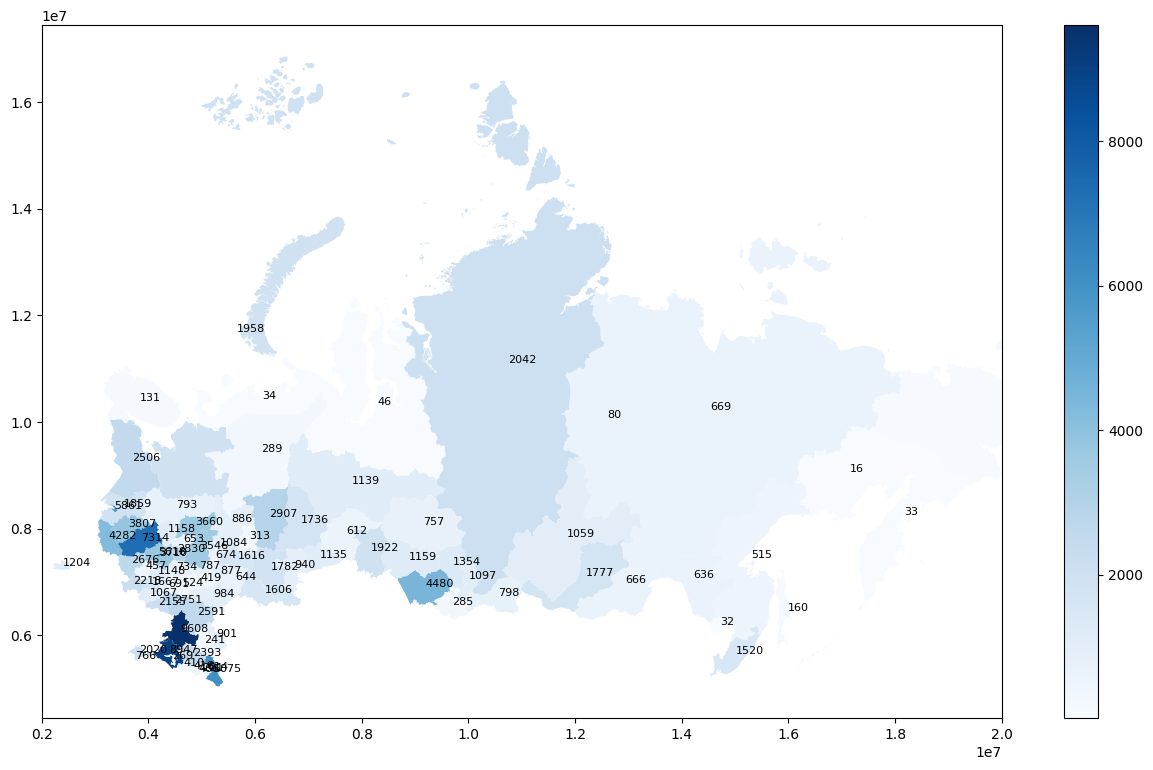

In [39]:
'''data_adr = data_cult['Регион']
data_adr.columns = ["NL_NAME_1"]#поименновываем колонки
data_adr["NL_NAME_1"]= data_adr["NL_NAME_1"].astype(str).apply(lambda x: x.split(",")[0]) # берём регион из полного адреса
data_adr["NL_NAME_1"]= data_adr["NL_NAME_1"].astype(str).apply(lambda x: x.upper()) #преобразовываем в верхний регистр для сравнения
data_group = data_adr.groupby("NL_NAME_1").count().sort_values("NL_NAME_1", ascending=False).reset_index()
print (data_group.head(30))'''
fig = plt.figure(figsize=(16,9))#задаем холст
area = plt.subplot(1, 1, 1) #задаем область
data_geo.plot(ax=area, legend=True, column="Объект", cmap="Blues") 
area.set_xlim(2e6, 2e7) # обрезаем калининград и чукотку и становиться крупнее карта на экране.
for _, region in data_geo.iterrows():
    area.annotate(region["Объект"],
                 xy=(region.geometry.centroid.x,
                    region.geometry.centroid.y), fontsize=8)
plt.show()

In [41]:
print (data_geo[data_geo["NL_NAME_1"] == "АЛТАЙСКИЙ КРАЙ"]["Объект"])
print (data_geo[data_geo["NL_NAME_1"] == "РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)"]["Объект"])

11    4480
Name: Объект, dtype: int64
63    1616
Name: Объект, dtype: int64
